In this example, we'll visualize a hard clustering of the classic iris dataset using KMeans.

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'type']


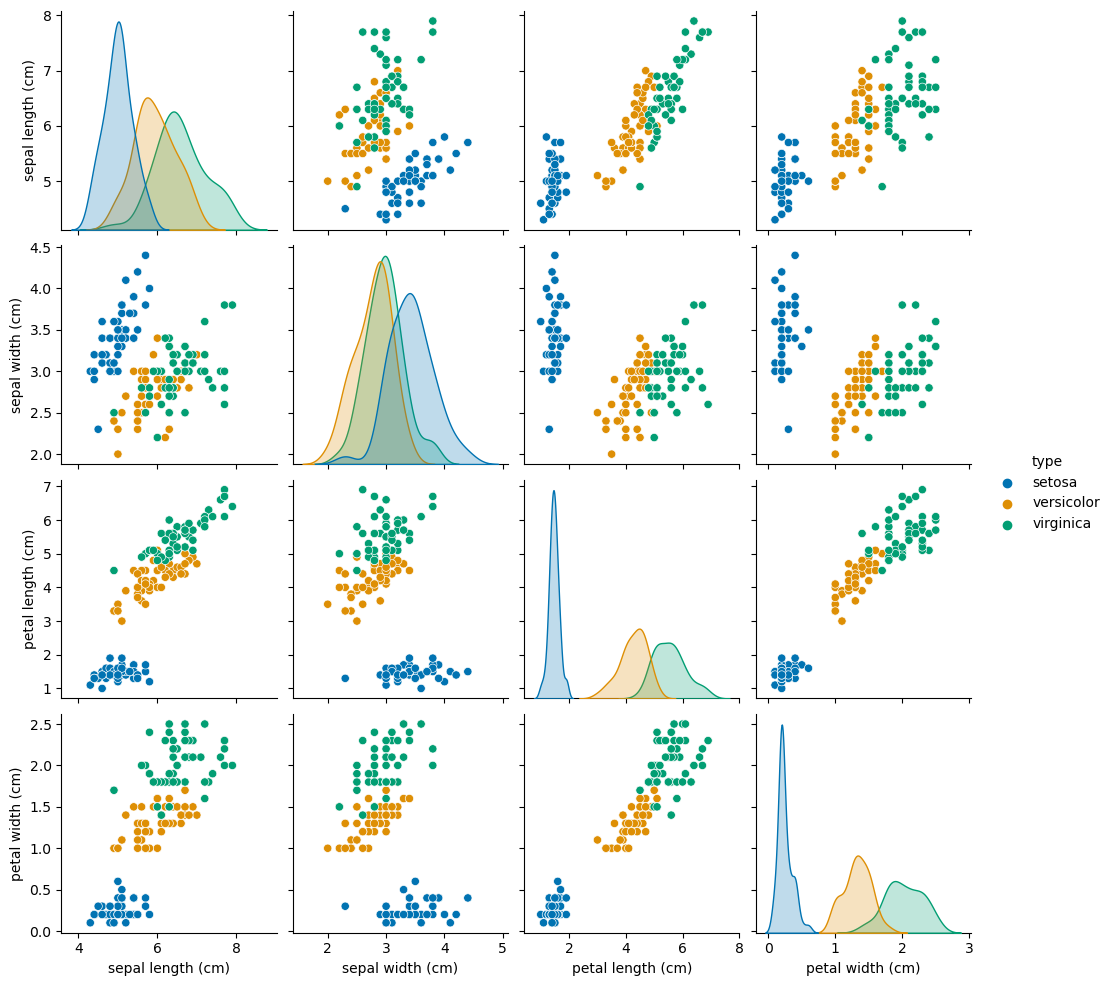

In [1]:
from clustervisualizer.ClusterAnalyzer import ClusterAnalyzer as clust

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import load_iris
from sklearn.cluster import KMeans



# Load iris data set ...
X, y = load_iris(as_frame=True, return_X_y=True)
# ... and add flower type to X dataframe
type_dict = { 0 : 'setosa',
              1 : 'versicolor',
              2 : 'virginica' }
X['type'] = [ type_dict[elem] for elem in y ]


# See data labels available
print( list(X) )


# Visualize correct distribution of flower cluster
sns.pairplot(X, hue='type', palette='colorblind')



In [2]:
# Cluster data using hard clustering
kmeans_obj = KMeans(n_clusters=3)
fit_params = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
preds = kmeans_obj.fit_predict( X[fit_params] )

Let's visualize the *predictions* of KMeans...
(and note that even if the prediction is 100% accurate, the plotted colors may not be the same as the plot above).

In [3]:
X['pred'] = preds
sns.pairplot(X, hue='pred', palette='colorblind')

Some of the clustering is correct... Comparing the original plot to the predictions plot, separating setosa (blue) from versicolor / virginica (orange / green) seems to be mostly right (evident from the petal width histograms). But the model struggles to distinguish all of versicolor from virginica. This is seen in the change in distribution shape of these two between the original pairsplot and the prediction pairsplot.

It might be handier to analyze the distribution of a cluster *relative to the entire distribution of a variable*. This can be accomplished using the ClusterAnalyzer class of the clustervisualizer package.

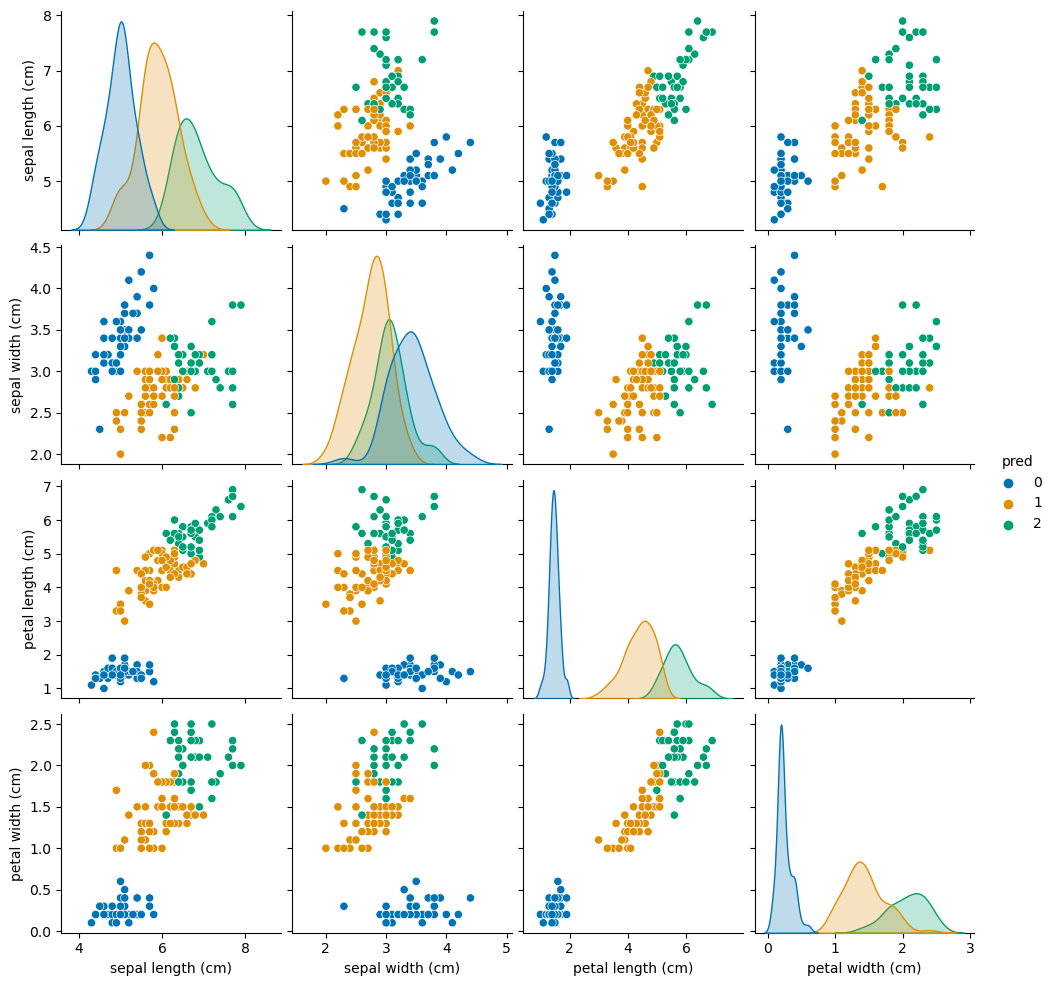

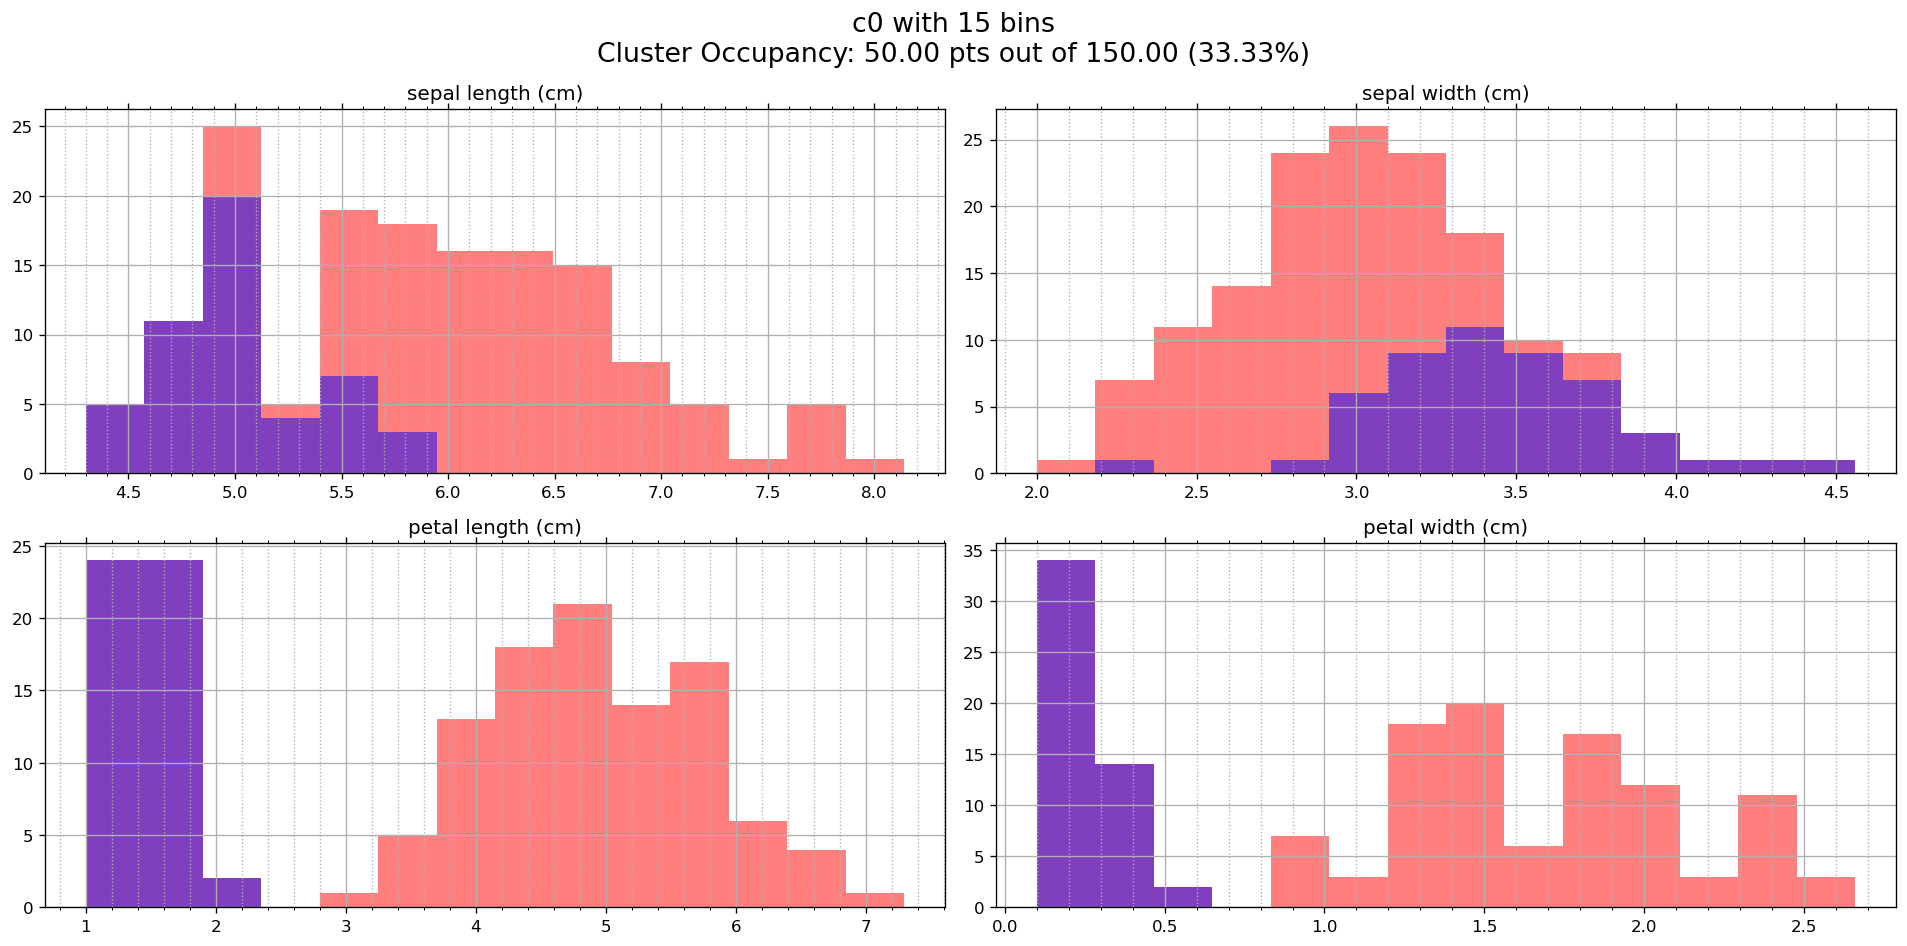

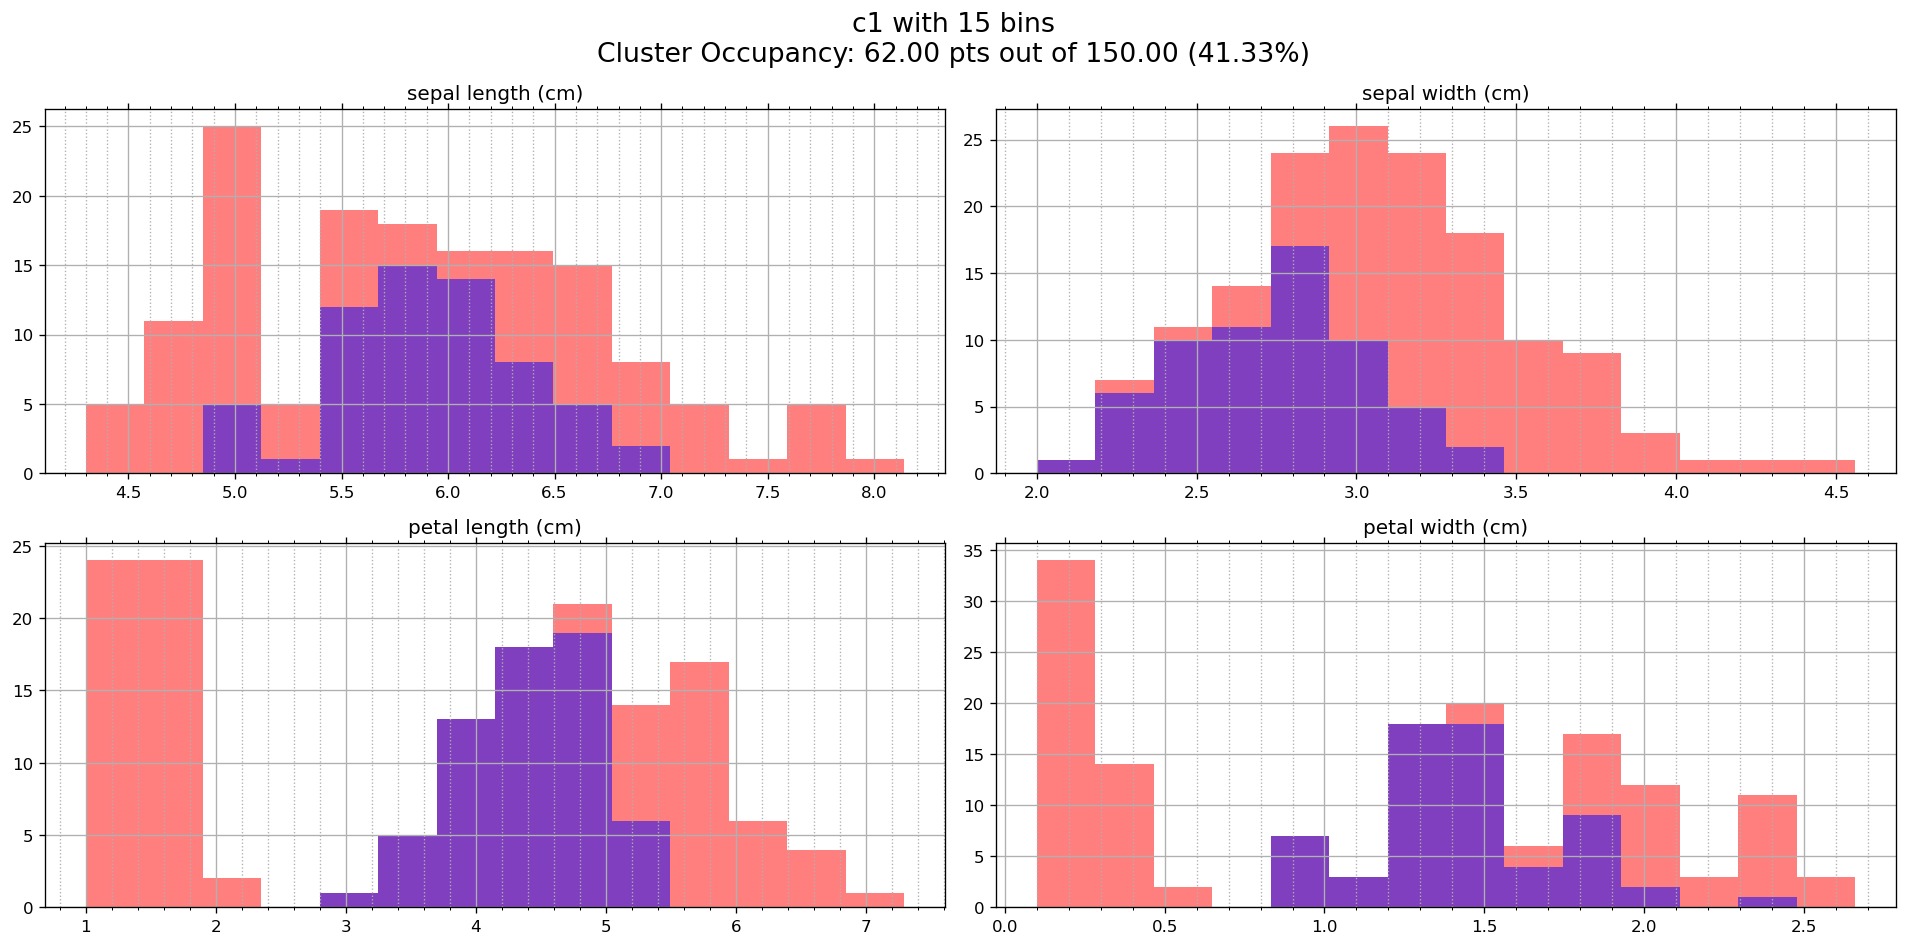

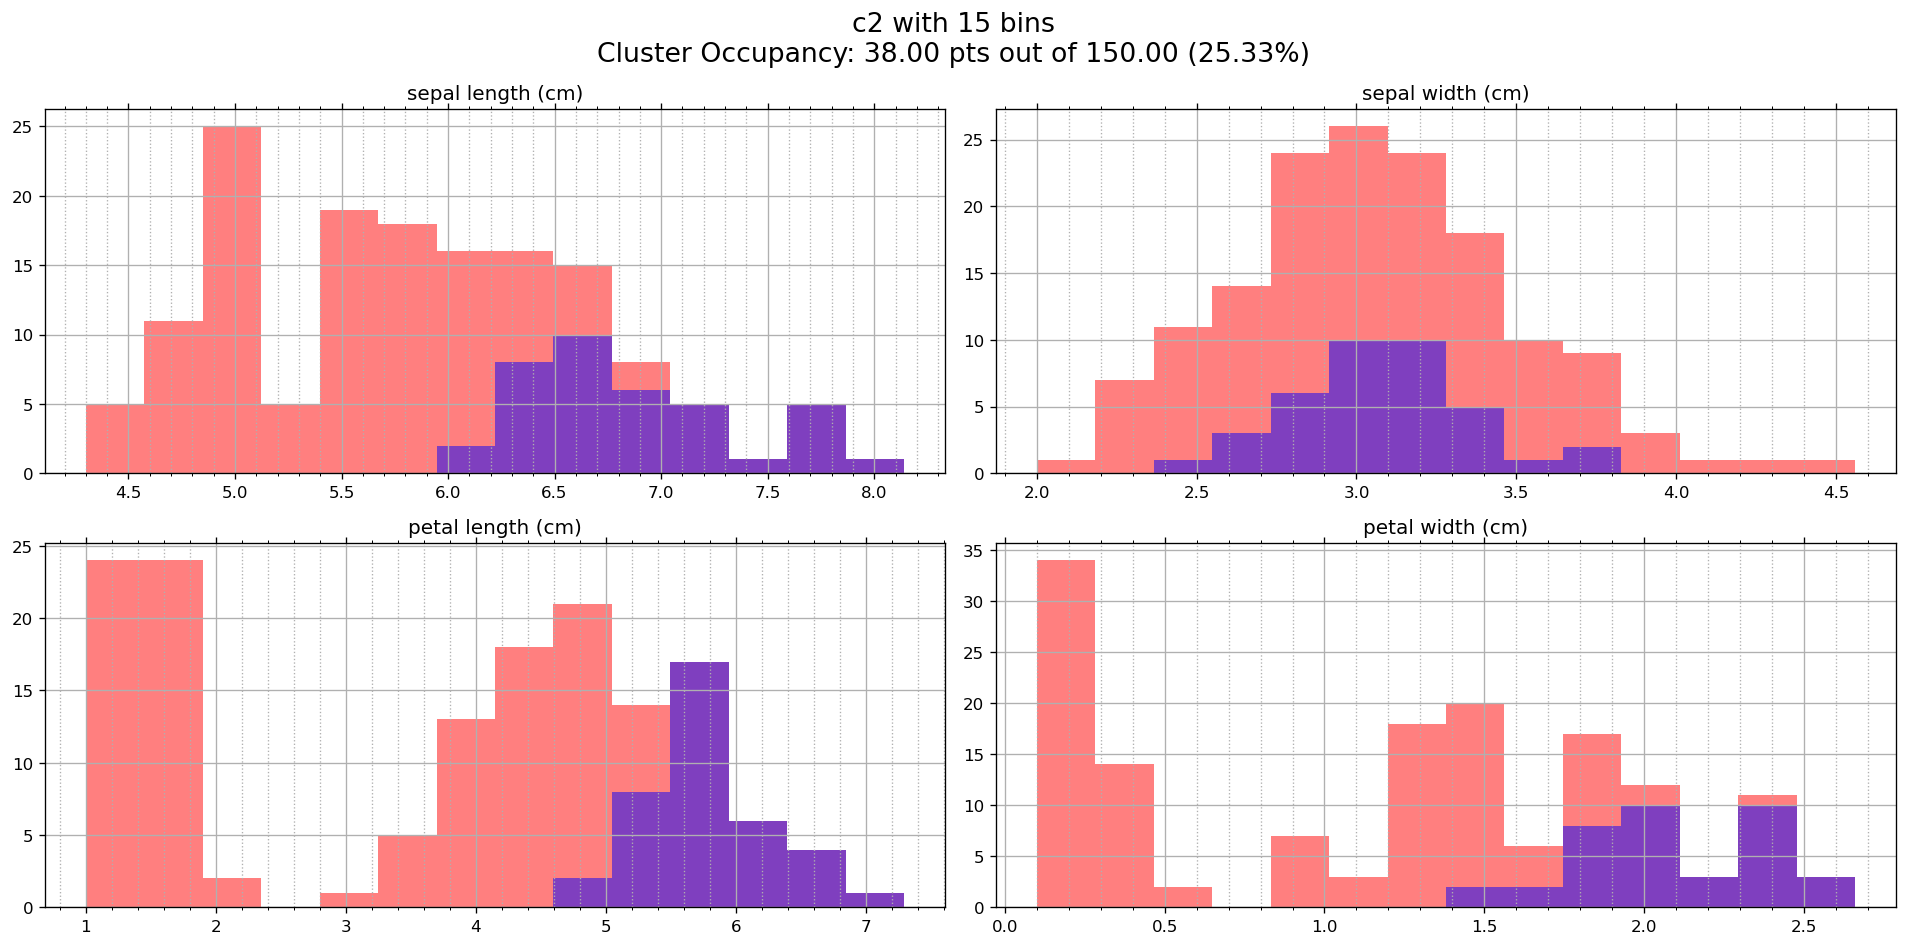

AttributeError: 'ClusterAnalyzer' object has no attribute 'rename_clusters'

In [4]:
# Instantiate ClusterAnalyzer
clust_inst = clust(X, preds)

# Create histograms
clust_inst.hist1d(hist_vars=fit_params,
                  bins=15)

clust_inst.rename_clusters({'c1':'setosa',
                            'c0':'virginica',
                            'c2':'versicolor'})

Making the entire distribution as the background (light red), the in-cluster distribution as the foreground (purple), and a set of these histograms for each cluster makes the predictions much more transparent.

The clusters can also be 'named' by passing a dict to the class. The keys are the desired 'names' and the values are the feature:
(1) The value 
as the labels of the dataframe that said cluster would have a maximum average ...
That is, if all data for said cluster were averaged

In [46]:
clust_inst.rename_clusters({'c1':'setosa',
                            'c0':'virginica',
                            'c2':'versicolor'})

clust_inst.hist1d(bins=20)



### Do cluster analysis using ClusterAnalyzer class


#. This dict will have
# the 'names' as the keys and 1 of 2 options as the value ...
#   (1) a label within the dataframe 
clust_inst = clust(
                X,
                preds,
                name_clusters={
                    'setosa': ('petal width (cm)', 
                               lambda x: -1*np.mean(x)),
                    'virginica': 'petal length (cm)',
                    'versicolor': ('sepal width (cm)',
                                   lambda x: -1*np.mean(x))
                                }
                    )
## Create histograms
clust_inst.hist1d(bins=15)
clust_inst.hist2d(bins=(10,10))

AttributeError: 'ClusterAnalyzer' object has no attribute 'rename_clusters'